<a href="https://colab.research.google.com/github/405620294/classwork/blob/main/nn/mlp_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


# explore data

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


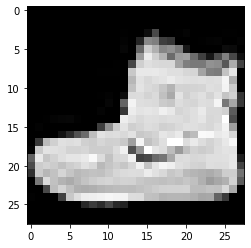

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
'''
0	T-shirt/top
1	Trouser 褲子
2	Pullover 大學T
3	Dress
4	Coat
5	Sandal 涼鞋
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

'\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

# preprocessing

In [7]:
# x: reshape 規一化
x_train_re = x_train.reshape(60000, -1) / 255.0
x_test_re = x_test.reshape(10000, -1) /255.0
x_test_re.shape[1]

784

In [8]:
# y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train_tocate = to_categorical(y_train, num_classes=10)
y_test_tocate = to_categorical(y_test, num_classes=10)

# create a model

In [9]:
# model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
layers = [ Dense(256, activation='relu', input_dim=x_train_re.shape[1]),
          Dense(10, activation='softmax')
]

model = Sequential(layers)

In [10]:
# compile
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(optimizer='adam', 
              loss=CategoricalCrossentropy(), 
              metrics=['accuracy'], 
)

# training

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(x_train_re, y_train_tocate, batch_size=100, validation_split=0.2, epochs=50, verbose=2, callbacks=callback)

Epoch 1/50
480/480 - 3s - loss: 0.5409 - accuracy: 0.8121 - val_loss: 0.4262 - val_accuracy: 0.8497
Epoch 2/50
480/480 - 2s - loss: 0.3946 - accuracy: 0.8601 - val_loss: 0.3794 - val_accuracy: 0.8647
Epoch 3/50
480/480 - 2s - loss: 0.3511 - accuracy: 0.8734 - val_loss: 0.3647 - val_accuracy: 0.8718
Epoch 4/50
480/480 - 2s - loss: 0.3276 - accuracy: 0.8811 - val_loss: 0.3672 - val_accuracy: 0.8668
Epoch 5/50
480/480 - 2s - loss: 0.3044 - accuracy: 0.8890 - val_loss: 0.3562 - val_accuracy: 0.8723
Epoch 6/50
480/480 - 2s - loss: 0.2897 - accuracy: 0.8935 - val_loss: 0.3404 - val_accuracy: 0.8804
Epoch 7/50
480/480 - 2s - loss: 0.2721 - accuracy: 0.9003 - val_loss: 0.3161 - val_accuracy: 0.8874
Epoch 8/50
480/480 - 2s - loss: 0.2617 - accuracy: 0.9032 - val_loss: 0.3316 - val_accuracy: 0.8840
Epoch 9/50
480/480 - 2s - loss: 0.2536 - accuracy: 0.9071 - val_loss: 0.3326 - val_accuracy: 0.8851
Epoch 10/50
480/480 - 2s - loss: 0.2408 - accuracy: 0.9116 - val_loss: 0.3046 - val_accuracy: 0.8895

# envaluating

In [12]:
model.evaluate(x_test_re, y_test_tocate)

313/313 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8824


[0.32854628562927246, 0.8823999762535095]

In [22]:
from sklearn.metrics import confusion_matrix
labels = ['top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

pre = model.predict_classes(x_test_re)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=[labels[i]+'預測' for i in range(10)],
             index=[labels[i]+'真實' for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,top預測,Trouser預測,Pullover預測,Dress預測,Coat預測,Sandal預測,Shirt預測,Sneaker預測,Bag預測,Ankle boot預測
top真實,862,2,12,21,4,1,94,0,4,0
Trouser真實,2,973,0,19,2,0,4,0,0,0
Pullover真實,13,0,772,16,129,0,70,0,0,0
Dress真實,20,6,9,913,21,1,26,0,4,0
Coat真實,0,1,74,53,817,0,54,0,1,0
Sandal真實,0,0,0,0,0,962,0,26,1,11
Shirt真實,140,1,76,28,92,0,657,0,6,0
Sneaker真實,0,0,0,0,0,15,0,953,0,32
Bag真實,9,0,4,4,6,2,12,6,957,0
Ankle boot真實,0,0,0,0,0,10,1,31,0,958


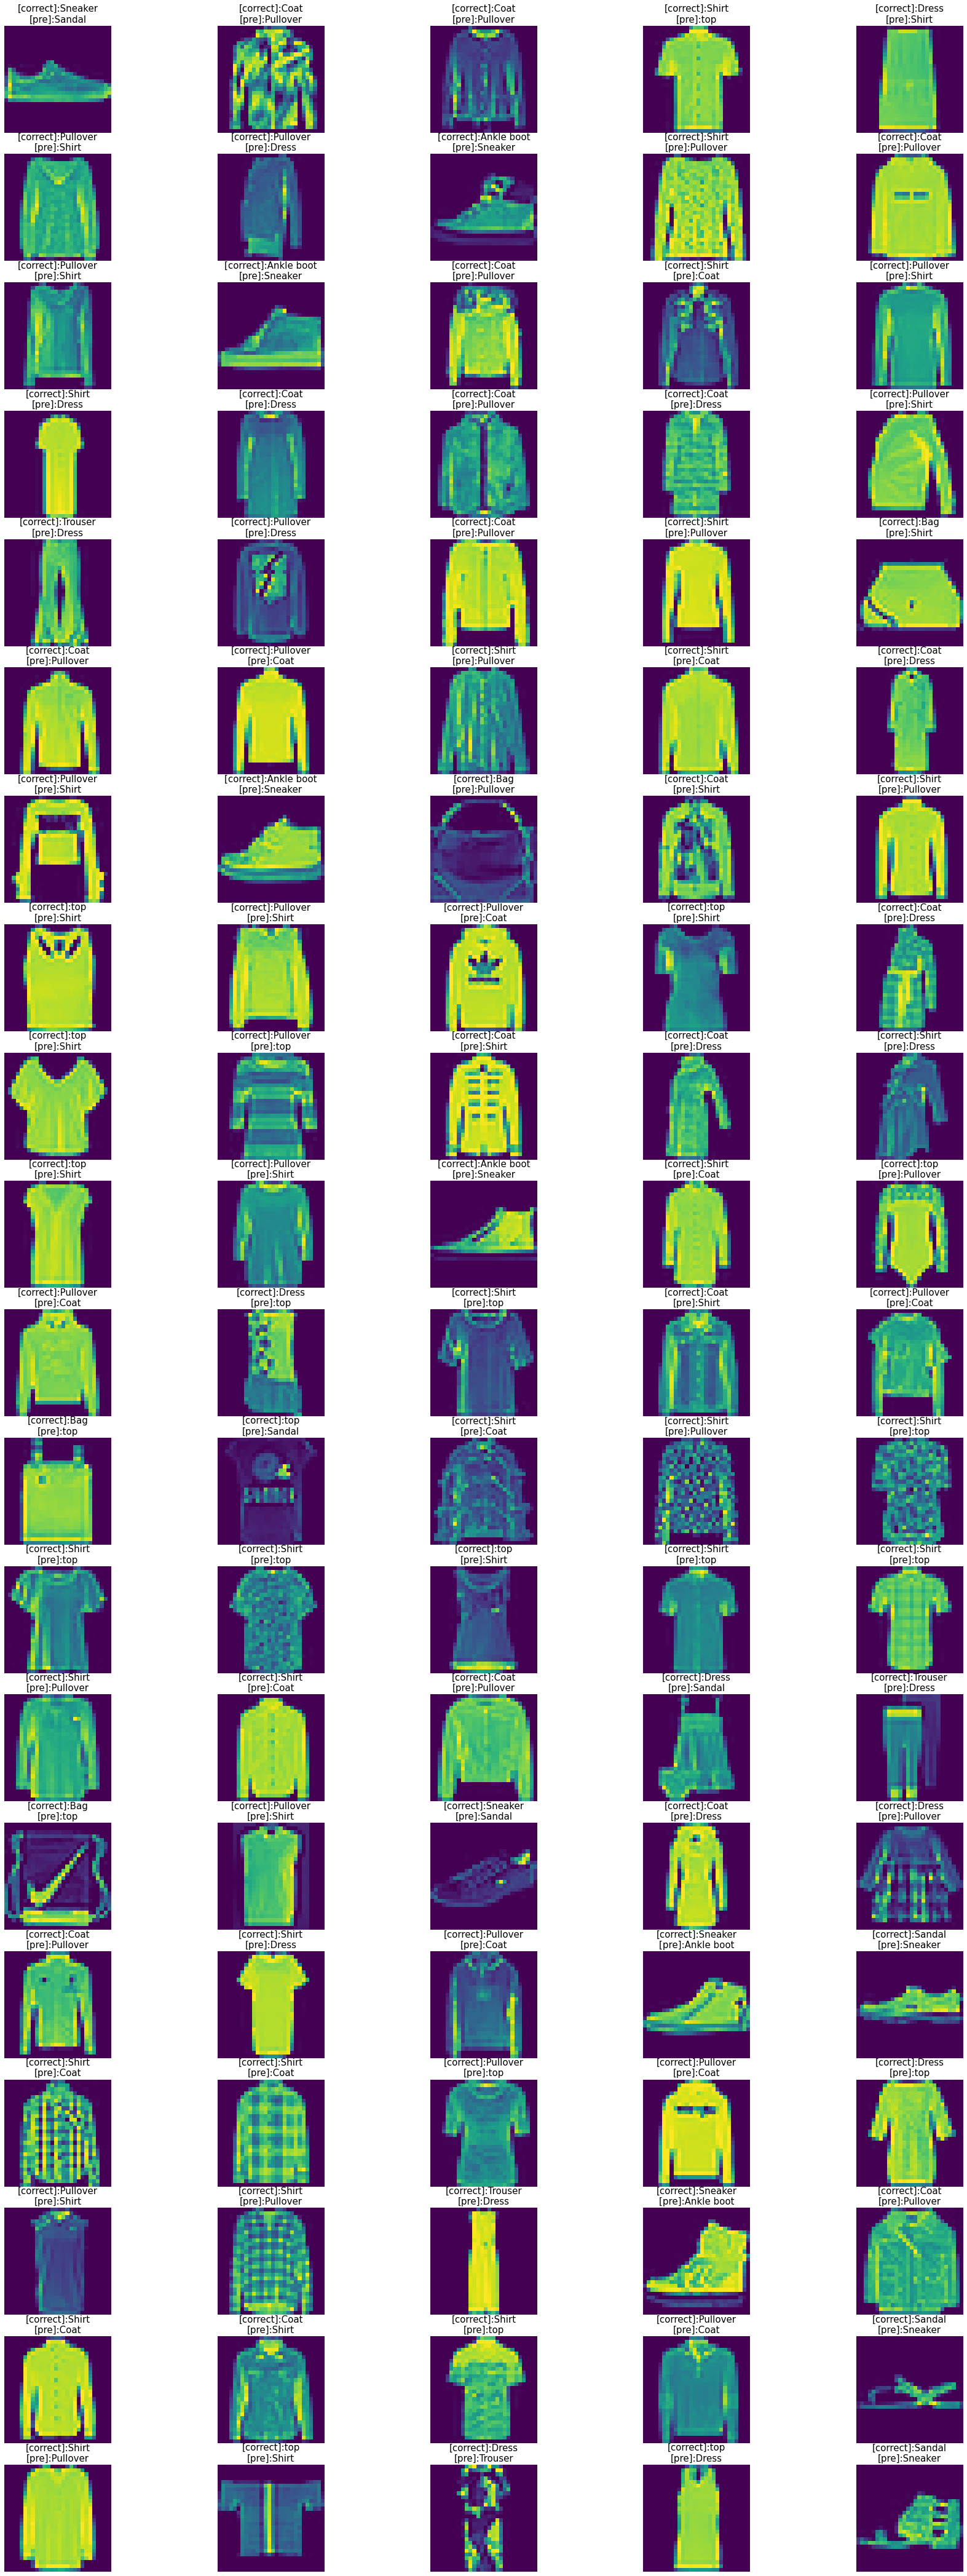

In [25]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:100]
wrong_img, wrong_pre, wrong_label = x_test[idx], pre[idx], y_test[idx]
w = 5
h = len(idx) // w + 1
plt.figure(figsize = (30, 80))
for i in range(len(idx)):
  plt.subplot(h, w, i+1)
  plt.imshow(wrong_img[i])
  t = '[correct]:{0}\n[pre]:{1}'.format(labels[wrong_label[i]], labels[wrong_pre[i]])
  plt.title(t, fontsize=15)
  plt.axis('off')